In [1]:
from isingNetwork import IsingModel
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#to compute things in parallel
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
print(num_cores)

12


-SMB-
1. Same size block, different connections

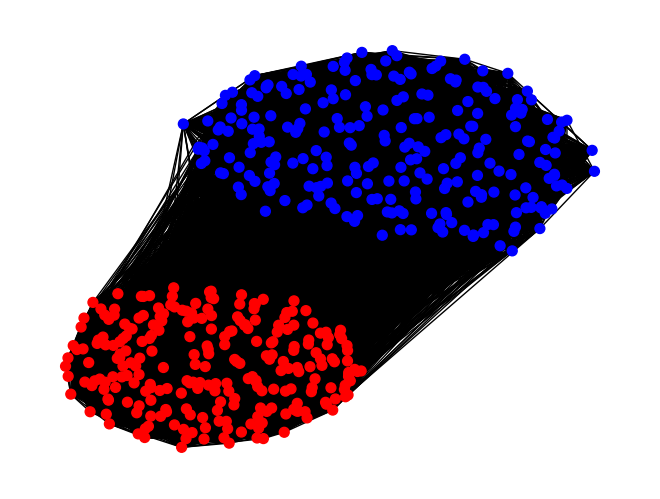

In [3]:
#SBM parameters

sizes = [250, 250]  #size of each block
p = [[0.8, 0.05],
     [0.05, 0.4]]

g = nx.stochastic_block_model(sizes, p)

# Assign node colors based on the block (Red for Block 0, Blue for Block 1)
node_colors = ['red' if g.nodes[node]['block'] == 0 else 'blue' for node in g.nodes]

# Draw the graph with node colors
#pos = nx.spring_layout(G, seed=42)  # Layout the graph
nx.draw(g, node_color=node_colors, with_labels=False, node_size=50)
plt.show()

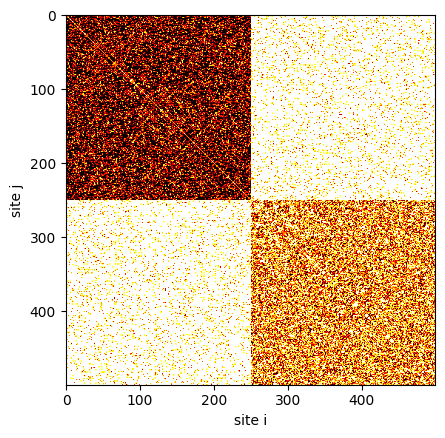

In [4]:
adj_matrix = nx.adjacency_matrix(g)
plt.imshow(adj_matrix.toarray(), cmap='hot_r')

#plt.gca().invert_yaxis()

plt.xlabel('site i')
plt.ylabel('site j')
plt.show()

In [5]:
model = IsingModel(g, iterations=20000, simmetric=False)

In [6]:
T = 0.1
h_range = np.linspace(-10,10,100)
def iterateForH(h):
    model.set_external_field(h)
    data = model.simulate(T)

    return data['magnetization_per_spin']

In [7]:
model.set_J(1)
MvsH_J1 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

In [8]:
model.set_J(-1)
MvsH_J2 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

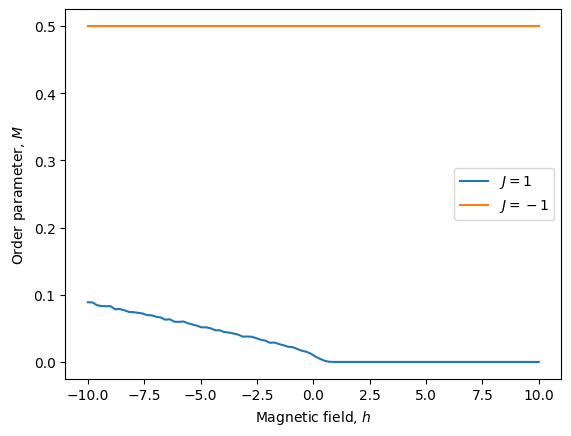

In [9]:
plt.plot(h_range, MvsH_J1, label=r'$J=1$')
plt.plot(h_range, MvsH_J2, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [10]:
#save data
MvsH = [MvsH_J1, MvsH_J2]
np.savez('SBM_M(h)_250x250_0.8,0.05,0.4.npz', *MvsH)

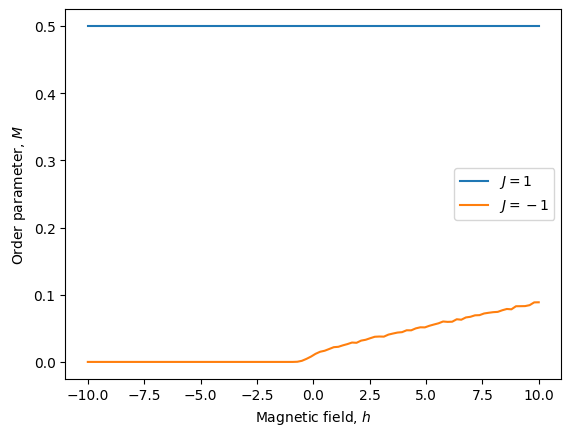

In [11]:
invertJ1 = MvsH_J1[::-1]
invertJ2 = MvsH_J2[::-1]

plt.plot(h_range, invertJ2, label=r'$J=1$')
plt.plot(h_range, invertJ1, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

2. Same size block, same (many) connection

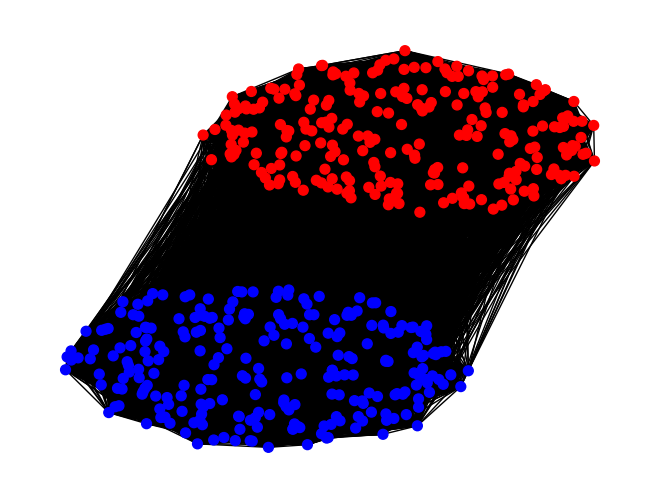

In [12]:
#SBM parameters

sizes = [250, 250]  #size of each block
p = [[0.8, 0.05],
     [0.05, 0.8]]

g = nx.stochastic_block_model(sizes, p)

# Assign node colors based on the block (Red for Block 0, Blue for Block 1)
node_colors = ['red' if g.nodes[node]['block'] == 0 else 'blue' for node in g.nodes]

# Draw the graph with node colors
#pos = nx.spring_layout(G, seed=42)  # Layout the graph
nx.draw(g, node_color=node_colors, with_labels=False, node_size=50)
plt.show()

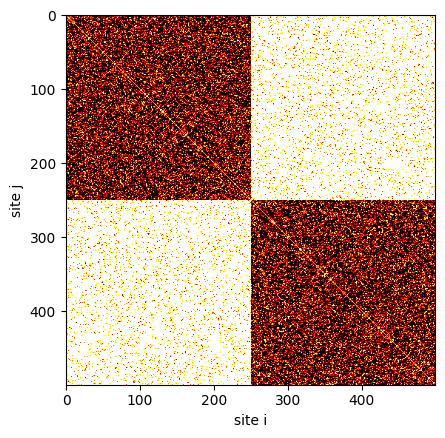

In [13]:
adj_matrix = nx.adjacency_matrix(g)
plt.imshow(adj_matrix.toarray(), cmap='hot_r')

#plt.gca().invert_yaxis()

plt.xlabel('site i')
plt.ylabel('site j')
plt.show()

In [14]:
model = IsingModel(g, iterations=20000, simmetric=False)

In [15]:
model.set_J(1)
MvsH_J1 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

In [16]:
model.set_J(-1)
MvsH_J2 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

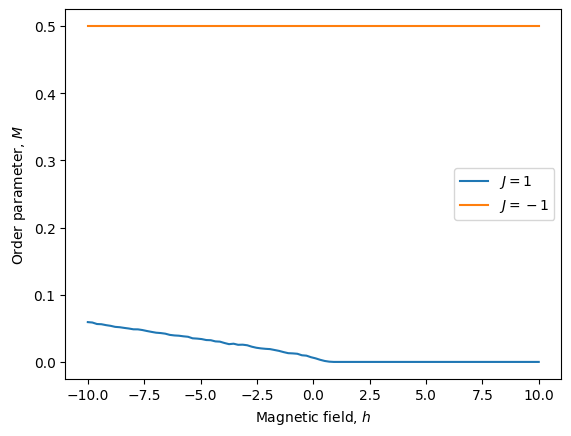

In [17]:
plt.plot(h_range, MvsH_J1, label=r'$J=1$')
plt.plot(h_range, MvsH_J2, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [18]:
#save data
MvsH = [MvsH_J1, MvsH_J2]
np.savez('SBM_M(h)_250x250_0.8,0.05,0.8.npz', *MvsH)

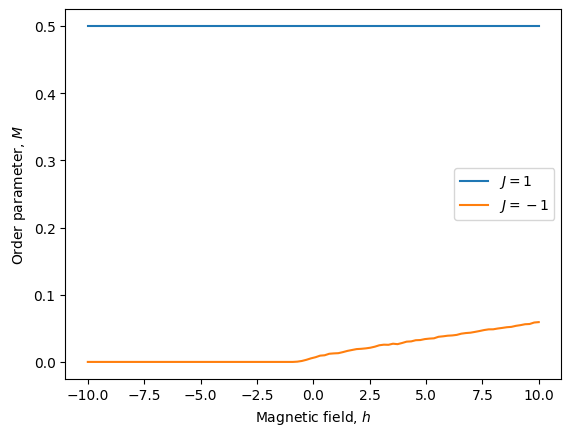

In [19]:
invertJ1 = MvsH_J1[::-1]
invertJ2 = MvsH_J2[::-1]

plt.plot(h_range, invertJ2, label=r'$J=1$')
plt.plot(h_range, invertJ1, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

3. Same size block, same (few) connection

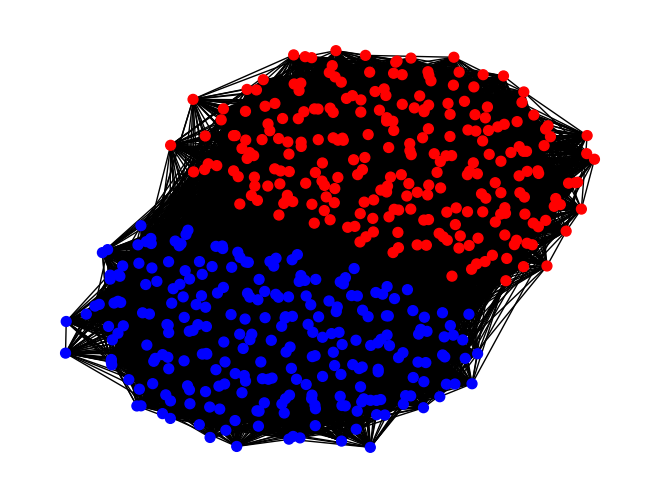

In [20]:
#SBM parameters

sizes = [250, 250]  #size of each block
p = [[0.2, 0.05],
     [0.05, 0.2]]

g = nx.stochastic_block_model(sizes, p)

# Assign node colors based on the block (Red for Block 0, Blue for Block 1)
node_colors = ['red' if g.nodes[node]['block'] == 0 else 'blue' for node in g.nodes]

# Draw the graph with node colors
#pos = nx.spring_layout(G, seed=42)  # Layout the graph
nx.draw(g, node_color=node_colors, with_labels=False, node_size=50)
plt.show()

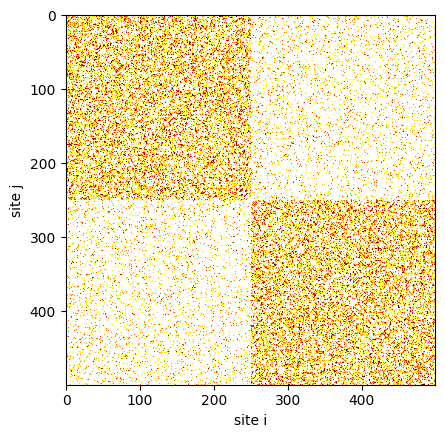

In [21]:
adj_matrix = nx.adjacency_matrix(g)
plt.imshow(adj_matrix.toarray(), cmap='hot_r')

#plt.gca().invert_yaxis()

plt.xlabel('site i')
plt.ylabel('site j')
plt.show()

In [22]:
model = IsingModel(g, iterations=20000, simmetric=False)

In [23]:
model.set_J(1)
MvsH_J1 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

In [24]:
model.set_J(-1)
MvsH_J2 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

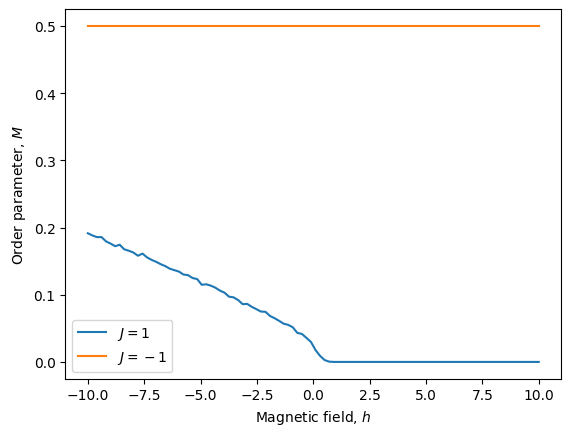

In [25]:
plt.plot(h_range, MvsH_J1, label=r'$J=1$')
plt.plot(h_range, MvsH_J2, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [26]:
#save data
MvsH = [MvsH_J1, MvsH_J2]
np.savez('SBM_M(h)_250x250_0.2,0.05,0.2.npz', *MvsH)

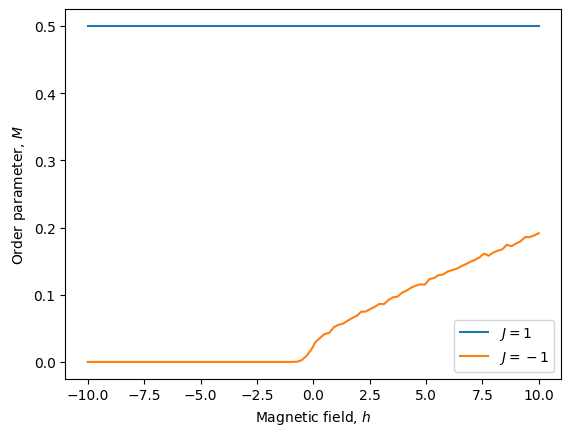

In [27]:
invertJ1 = MvsH_J1[::-1]
invertJ2 = MvsH_J2[::-1]

plt.plot(h_range, invertJ2, label=r'$J=1$')
plt.plot(h_range, invertJ1, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

4. Different size blocks, same (many) connection

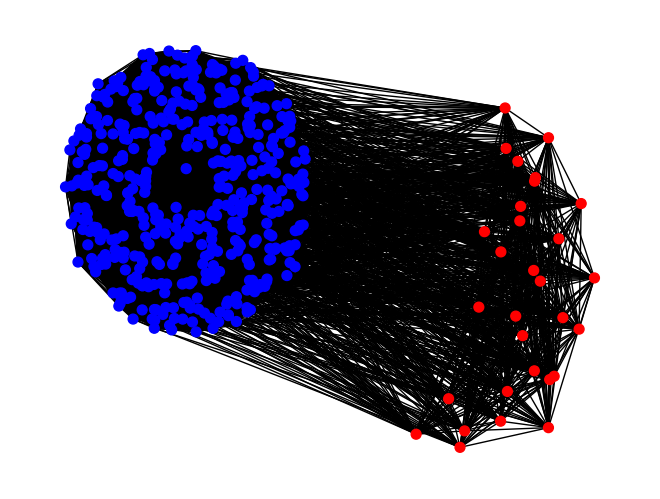

In [28]:
#SBM parameters

sizes = [30, 470]  # Block sizes
p = [[0.8, 0.05],
     [0.05, 0.8]]  # Block connectivity probabilities
g = nx.stochastic_block_model(sizes, p)

# Assign node colors based on the block (Red for Block 0, Blue for Block 1)
node_colors = ['red' if g.nodes[node]['block'] == 0 else 'blue' for node in g.nodes]

# Draw the graph with node colors
#pos = nx.spring_layout(G, seed=42)  # Layout the graph
nx.draw(g, node_color=node_colors, with_labels=False, node_size=50)
plt.show()

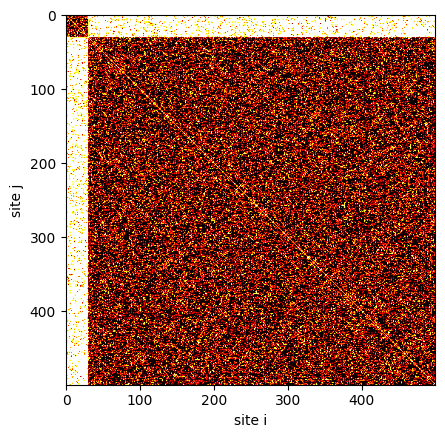

In [29]:
adj_matrix = nx.adjacency_matrix(g)
plt.imshow(adj_matrix.toarray(), cmap='hot_r')

#plt.gca().invert_yaxis()

plt.xlabel('site i')
plt.ylabel('site j')
plt.show()

In [30]:
model = IsingModel(g, iterations=20000, simmetric=False)

In [31]:
model.set_J(1)
MvsH_J1 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

In [32]:
model.set_J(-1)
MvsH_J2 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

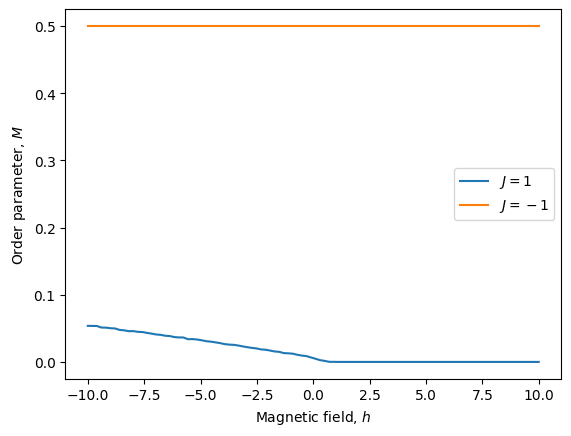

In [33]:
plt.plot(h_range, MvsH_J1, label=r'$J=1$')
plt.plot(h_range, MvsH_J2, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [34]:
#save data
MvsH = [MvsH_J1, MvsH_J2]
np.savez('SBM_M(h)_30x470_0.8,0.05,0.8.npz', *MvsH)

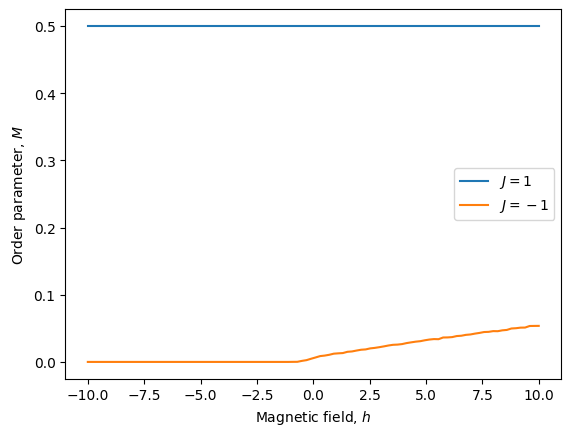

In [35]:
invertJ1 = MvsH_J1[::-1]
invertJ2 = MvsH_J2[::-1]

plt.plot(h_range, invertJ2, label=r'$J=1$')
plt.plot(h_range, invertJ1, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

5. Different size blocks, same (few) connections

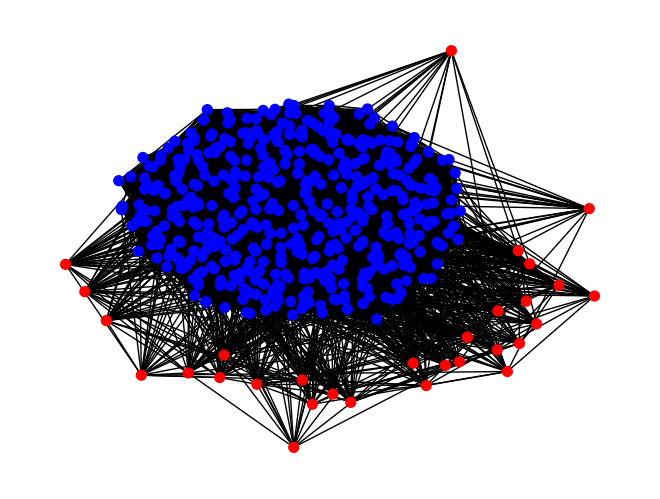

In [36]:
#SBM parameters

sizes = [30, 470]  # Block sizes
p = [[0.2, 0.05],
     [0.05, 0.2]]  # Block connectivity probabilities
g = nx.stochastic_block_model(sizes, p)

# Assign node colors based on the block (Red for Block 0, Blue for Block 1)
node_colors = ['red' if g.nodes[node]['block'] == 0 else 'blue' for node in g.nodes]

# Draw the graph with node colors
#pos = nx.spring_layout(G, seed=42)  # Layout the graph
nx.draw(g, node_color=node_colors, with_labels=False, node_size=50)
plt.show()

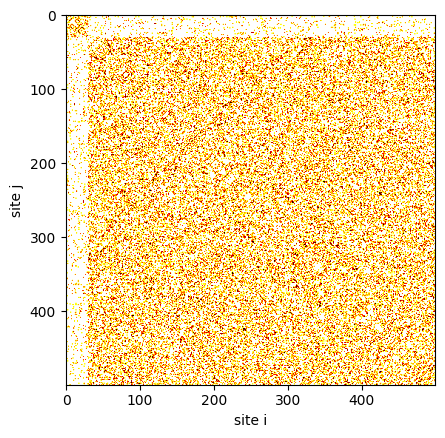

In [37]:
adj_matrix = nx.adjacency_matrix(g)
plt.imshow(adj_matrix.toarray(), cmap='hot_r')

#plt.gca().invert_yaxis()

plt.xlabel('site i')
plt.ylabel('site j')
plt.show()

In [38]:
model = IsingModel(g, iterations=20000, simmetric=False)

In [39]:
model.set_J(1)
MvsH_J1 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

In [40]:
model.set_J(-1)
MvsH_J2 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

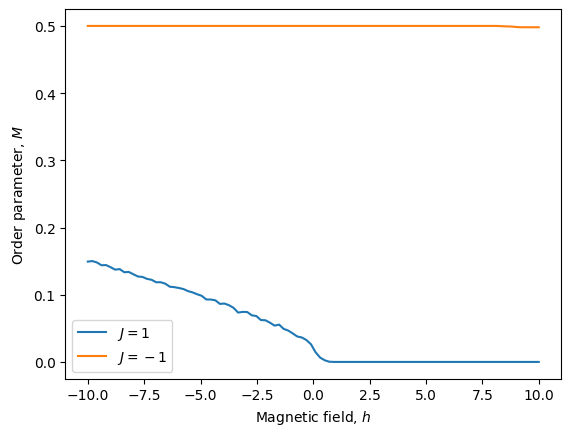

In [41]:
plt.plot(h_range, MvsH_J1, label=r'$J=1$')
plt.plot(h_range, MvsH_J2, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [42]:
#save data
MvsH = [MvsH_J1, MvsH_J2]
np.savez('SBM_M(h)_30x470_0.2,0.05,0.2.npz', *MvsH)

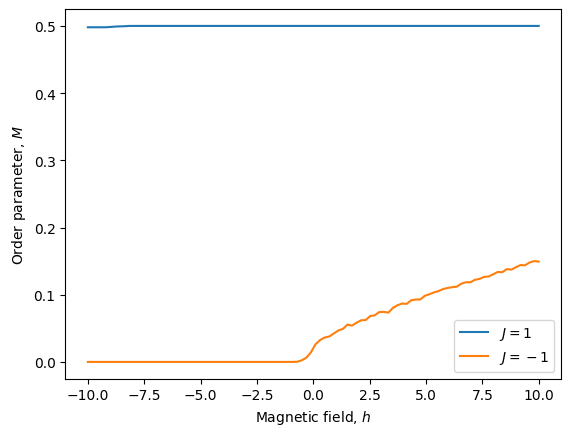

In [43]:
invertJ1 = MvsH_J1[::-1]
invertJ2 = MvsH_J2[::-1]

plt.plot(h_range, invertJ2, label=r'$J=1$')
plt.plot(h_range, invertJ1, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

6. Different size, different weight

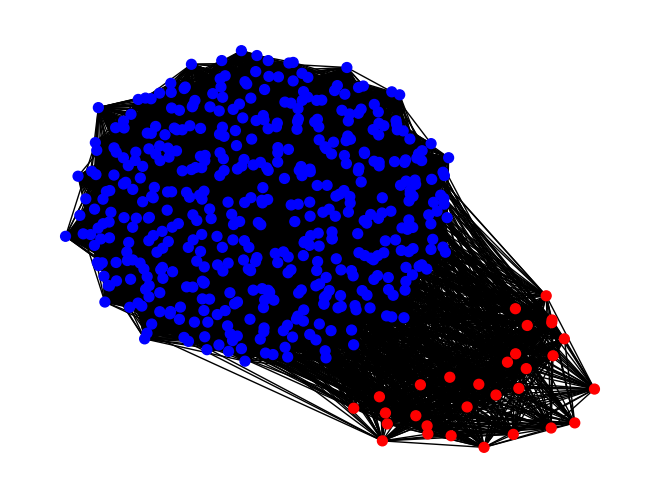

In [44]:
#SBM parameters

sizes = [30, 470]  # Block sizes
p = [[0.8, 0.05],
     [0.05, 0.2]]  # Block connectivity probabilities
g = nx.stochastic_block_model(sizes, p)

# Assign node colors based on the block (Red for Block 0, Blue for Block 1)
node_colors = ['red' if g.nodes[node]['block'] == 0 else 'blue' for node in g.nodes]

# Draw the graph with node colors
#pos = nx.spring_layout(G, seed=42)  # Layout the graph
nx.draw(g, node_color=node_colors, with_labels=False, node_size=50)
plt.show()

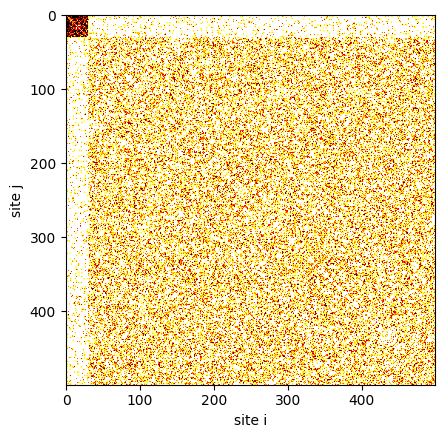

In [45]:
adj_matrix = nx.adjacency_matrix(g)
plt.imshow(adj_matrix.toarray(), cmap='hot_r')

#plt.gca().invert_yaxis()

plt.xlabel('site i')
plt.ylabel('site j')
plt.show()

In [46]:
model = IsingModel(g, iterations=20000, simmetric=False)

In [47]:
model.set_J(1)
MvsH_J1 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

In [48]:
model.set_J(-1)
MvsH_J2 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

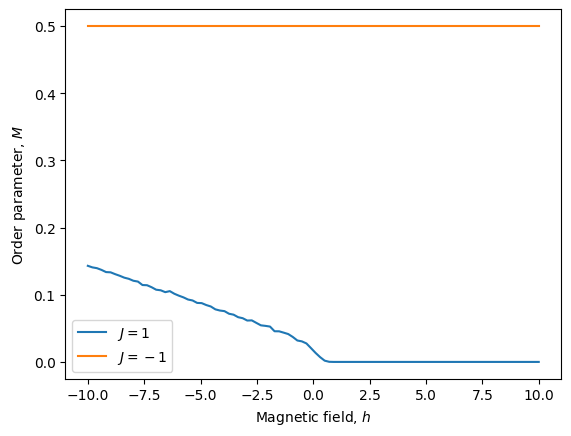

In [49]:
plt.plot(h_range, MvsH_J1, label=r'$J=1$')
plt.plot(h_range, MvsH_J2, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [50]:
#save data
MvsH = [MvsH_J1, MvsH_J2]
np.savez('SBM_M(h)_30x470_0.8,0.05,0.2.npz', *MvsH)

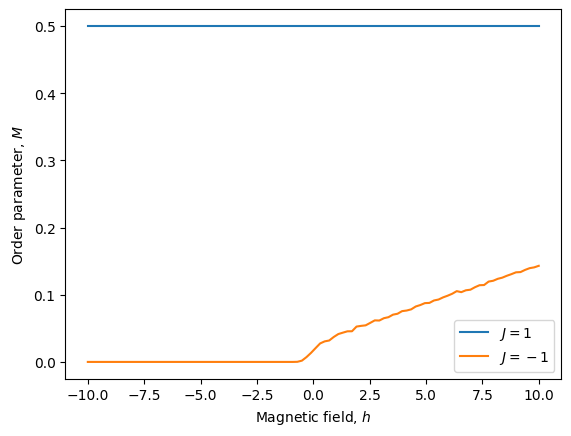

In [51]:
invertJ1 = MvsH_J1[::-1]
invertJ2 = MvsH_J2[::-1]

plt.plot(h_range, invertJ2, label=r'$J=1$')
plt.plot(h_range, invertJ1, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

7. Different size blocks, different connection (approximating BA model)

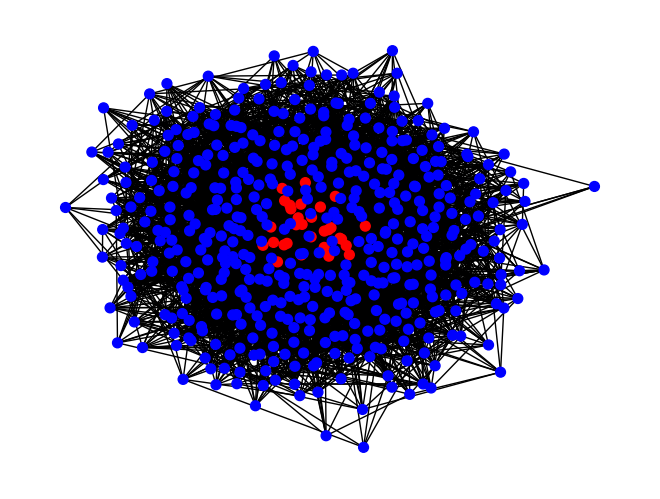

In [52]:
#SBM parameters

sizes = [30, 470]  # Block sizes
p = [[0.5, 0.07],
     [0.07, 0.03]]  # Block connectivity probabilities
g = nx.stochastic_block_model(sizes, p)

# Assign node colors based on the block (Red for Block 0, Blue for Block 1)
node_colors = ['red' if g.nodes[node]['block'] == 0 else 'blue' for node in g.nodes]

# Draw the graph with node colors
#pos = nx.spring_layout(G, seed=42)  # Layout the graph
nx.draw(g, node_color=node_colors, with_labels=False, node_size=50)
plt.show()

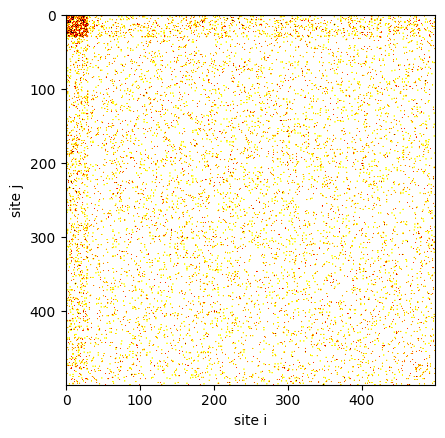

In [53]:
adj_matrix = nx.adjacency_matrix(g)
plt.imshow(adj_matrix.toarray(), cmap='hot_r')

#plt.gca().invert_yaxis()

plt.xlabel('site i')
plt.ylabel('site j')
plt.show()

In [54]:
model = IsingModel(g, iterations=20000, simmetric=False)

In [55]:
model.set_J(1)
MvsH_J1 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

In [56]:
model.set_J(-1)
MvsH_J2 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

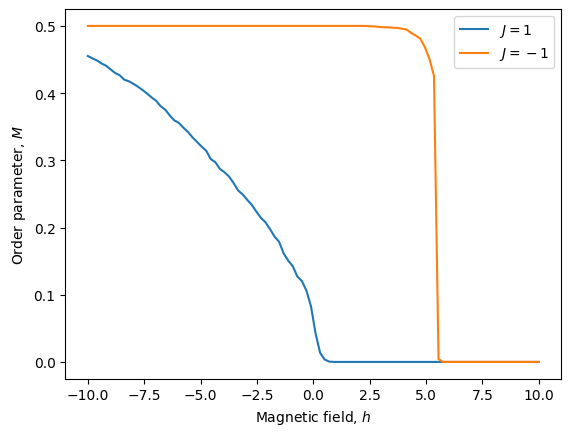

In [57]:
plt.plot(h_range, MvsH_J1, label=r'$J=1$')
plt.plot(h_range, MvsH_J2, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [58]:
#save data
MvsH = [MvsH_J1, MvsH_J2]
np.savez('SBM_M(h)_30x470_0.5,0.07,0.03.npz', *MvsH)

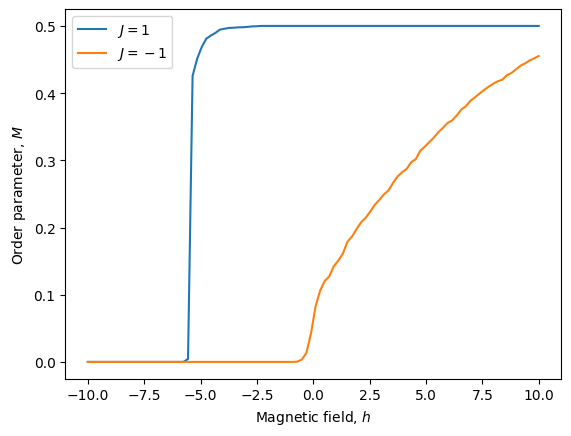

In [59]:
invertJ1 = MvsH_J1[::-1]
invertJ2 = MvsH_J2[::-1]

plt.plot(h_range, invertJ2, label=r'$J=1$')
plt.plot(h_range, invertJ1, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()